<a href="https://colab.research.google.com/github/ssaulrj/codes-python/blob/master/artificial-vision-actumlogos-python/class_three_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

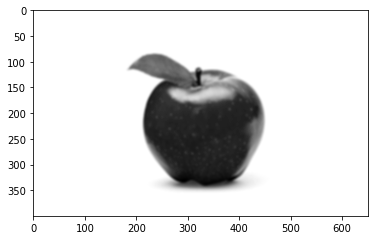

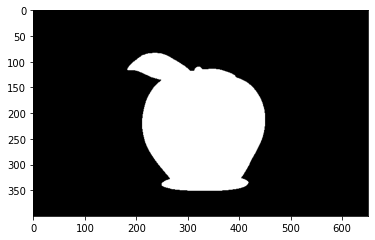

In [1]:
# Importación de bibliotecas
import cv2
import matplotlib.pyplot as plt

# Cargando imagen y mostrandola
imagen_original = cv2.imread('manzana.jpg')
grises = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)
filtrada = cv2.GaussianBlur(grises, (7,7), 2)
plt.imshow(filtrada, cmap='gray')
plt.show()

# Umabralización de la imagen
ret, th =  cv2.threshold(filtrada, 230, 255, cv2.THRESH_BINARY_INV)
plt.imshow(th, cmap='gray')
plt.show()

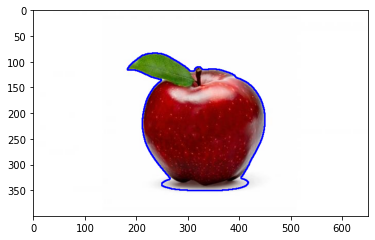

In [2]:
# Se encuentran los contornos
cont, ret = cv2.findContours(th, cv2.RETR_EXTERNAL, 
                             cv2.CHAIN_APPROX_SIMPLE)

contornos = imagen_original.copy()
# Se dibujan los contornos
cv2.drawContours(contornos, cont, -1, (255,0,0),2)
contornos = cv2.cvtColor(contornos, cv2.COLOR_BGR2RGB)
plt.imshow(contornos)
plt.show()

El área del objeto es 49063.0


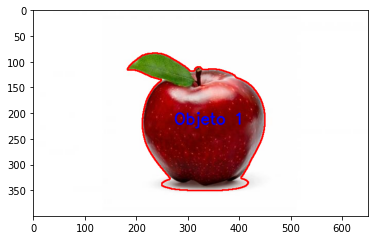

In [3]:
# Cálculo de los momentos de una imagen
img_final = imagen_original.copy()
img_final = cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB)

for num, c in enumerate(cont):
  # Cálculo de los momentos 
  M=cv2.moments(c)
  if M['m00'] == 0:
      M['m00'] = 0.1
  
  # Cálculo del centroide
  x=int(M["m10"]/M["m00"])
  y=int(M['m01']/M['m00'])

  #Se colocan textos a cada objeto encontrado
  mensaje = f'Objeto {num+1}'
  print('El área del objeto es', M['m00'])
  cv2.putText(img_final,mensaje,(x-50,y), cv2.FONT_HERSHEY_SIMPLEX, 
              1, (0,0,255), 2, cv2.LINE_AA)
  
  cv2.drawContours(img_final, [c], -1, (255,0,0), 2)

plt.imshow(img_final)
plt.show()
  

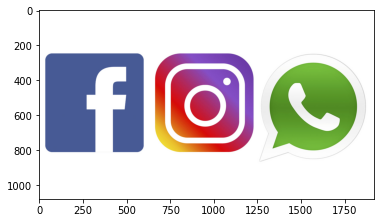

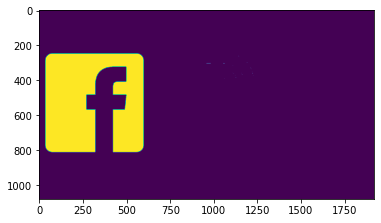

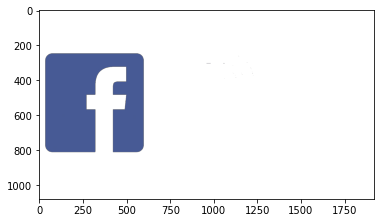

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Se seleccionan los rangos de H
rango_azul1 = np.array([100, 100, 20], np.uint8)
rango_azul2 = np.array([130, 255, 255], np.uint8)

# Lectura de la imagen y conversión a HSV
imagen = cv2.imread('redes.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGBA)
imagen_HSV = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)

# Creación de la mascara de color
mascara_azul = cv2.inRange(imagen_HSV, rango_azul1, rango_azul2)
segmentada_color = cv2.bitwise_and(imagen, imagen, mask=mascara_azul)        

plt.imshow(imagen)
plt.show()

plt.imshow(mascara_azul)
plt.show()

plt.imshow(segmentada_color)
plt.show()

Número de puntos detectados:  984


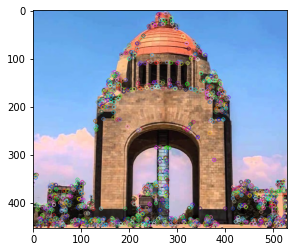

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('revolucion2.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

# Crear detector FAST 
fast = cv2.FastFeatureDetector_create(50)

# Se obtienen los puntos caracteristicos
keypoints = fast.detect(gris, None)
print("Número de puntos detectados: ", len(keypoints))

# Se dibujan los puntos caracteristicos
cv2.drawKeypoints(imagen, keypoints, imagen, 
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(imagen)
plt.show()



Número de puntos detectados:  500


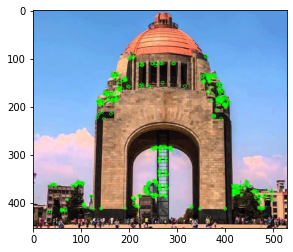

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_ori = cv2.imread('revolucion2.jpg')
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img_ori, cv2.COLOR_RGB2GRAY)

# Se crea el objeto ORB
orb = cv2.ORB_create()

# Se encuentran puntos caracteristicos con ORB
kp = orb.detect(img, None)

# Calcula descriptores con ORB
kp, des = orb.compute(img, kp)
print("Número de puntos detectados: ", len(kp))

img2 = img_ori.copy()

# Dibuja los puntos caracteriticos
cv2.drawKeypoints(img_ori, kp, img2, color=(0,255,0), flags=0)

plt.imshow(img2)
plt.show()